# Data Description

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
wids = pd.read_csv('training_v2.csv')
wids.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [60]:
print("This data has {} rows and {} columns.".format(wids.shape[0], wids.shape[1]))

This data has 91713 rows and 186 columns.


In [61]:
# Patient_id and encounter_id are unique
wids[['encounter_id', 'patient_id', 'hospital_id']].nunique()

encounter_id    91713
patient_id      91713
hospital_id       147
dtype: int64

In [62]:
# Distribution of target. Unbalanced dataset. 
wids['hospital_death'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

# Missing Values

In [63]:
# Missing V
missing_perc = wids.isna().sum(axis=0).sort_values(ascending = False)/wids.shape[0]

miss_over_half_col = missing_perc[missing_perc > 0.55]

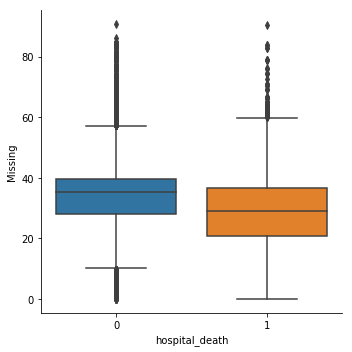

In [117]:
# For the patients missing >=50% of certain columns - did they survive or die?
# 91688 paitents are missing more than half of the columns. 
missing_perc_row = wids.isnull().sum(axis = 1)/wids.shape[1]*100

df = pd.DataFrame({'hospital_death': wids.hospital_death, 'Missing': missing_perc_row})

sns.catplot(x='hospital_death', y='Missing', kind='box', data=df)

Non-survivals hace less missing values, in terms of IQR and mean.

# Vitals
'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min'

In [3]:
vitals_1 = wids[['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min']]

In [4]:
# Correlation matrix
vitals_1['hospital_death'] = wids['hospital_death']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


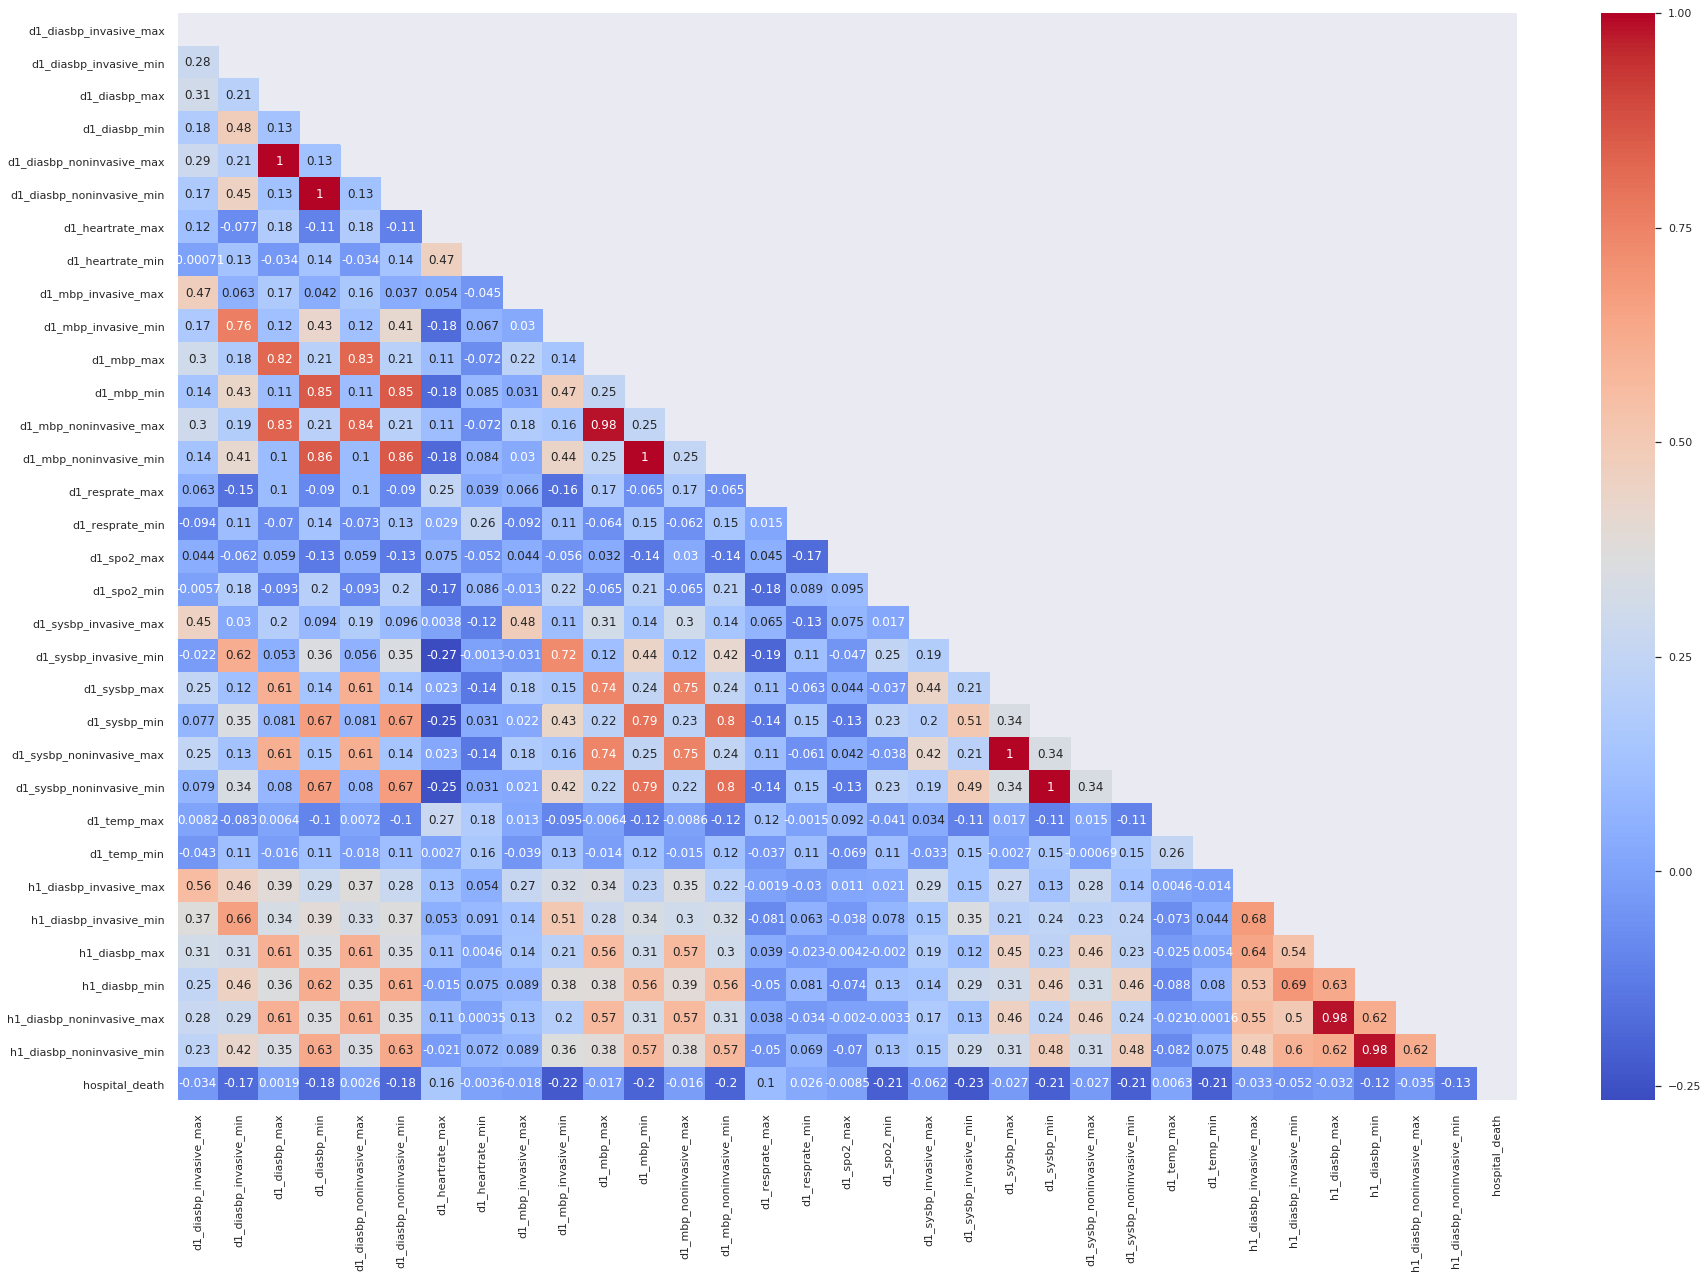

In [8]:
sns.set(rc={'figure.figsize':(30,20)})
matrix = np.triu(vitals_1.corr())
sns.heatmap(vitals_1.corr(), annot=True, mask=matrix, cmap = 'coolwarm')

#### diasbp (diastolic blood pressure) during first 24 hours.

In [26]:
# The synthesized (both invasive and non-invasive) has less missing values. Should keep these ones only. 
# This also happens to other blood pressure predictors. 
vitals_1.loc[vitals_1['d1_diasbp_max'] != vitals_1['d1_diasbp_noninvasive_max']]

# Check if invasive or non_invasive affects target. Patients had invasive method tend to be positive. 
wids.loc[wids['d1_diasbp_invasive_max'].isna(), 'hospital_death'].value_counts(normalize=True)

0    0.927601
1    0.072399
Name: hospital_death, dtype: float64

In [28]:
wids.loc[~wids['d1_diasbp_invasive_max'].isna(), 'hospital_death'].value_counts(normalize=True)



0    0.873867
1    0.126133
Name: hospital_death, dtype: float64

In [35]:
# Create column diasbp invasive or not
wids['diasbp_isInvasive'] = ~wids['d1_diasbp_invasive_max'].isna()*1

In [38]:
# Drop invasive and non-invasive and keep synthesized only.
wids.drop(['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min','d1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min'], axis = 1, inplace=True)

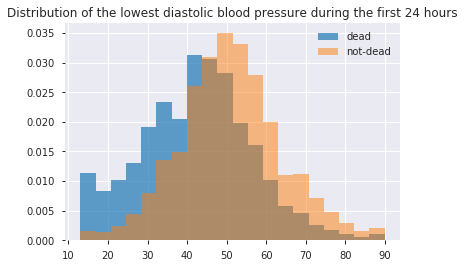

In [58]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_diasbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_diasbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest diastolic blood pressure during the first 24 hours')

plt.show()

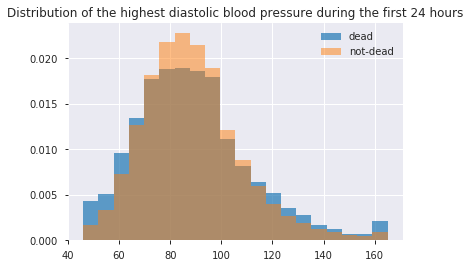

In [59]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_diasbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_diasbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest diastolic blood pressure during the first 24 hours')

plt.show()

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4197073/

Positive patients' lowest diastolic blood presssure is lower. The highest is also more extreme on both ends. 

#### mbp (mean blood pressure)

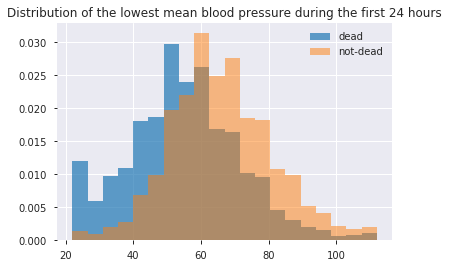

In [84]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_mbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_mbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest mean blood pressure during the first 24 hours')

plt.show()

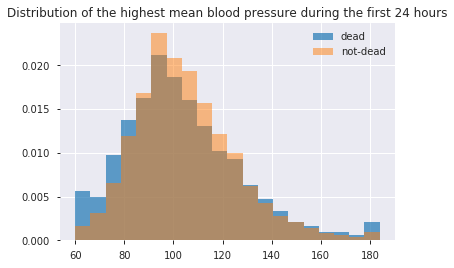

In [85]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_mbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_mbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest mean blood pressure during the first 24 hours')

plt.show()

Positive patients clearly had a more left-skewed lower mean blood pressure distribution. They had a lower highest pressure as well. 

#### sysbp (systolic blood pressure )

In [82]:
wids.loc[wids['d1_sysbp_max'].isna(), 'hospital_death'].value_counts(normalize=True)

0    0.805031
1    0.194969
Name: hospital_death, dtype: float64

In [90]:
# Create column indicating whether sysbp is missing. 
wids['is_sysbp_missing'] = wids['d1_sysbp_max'].isna()*1

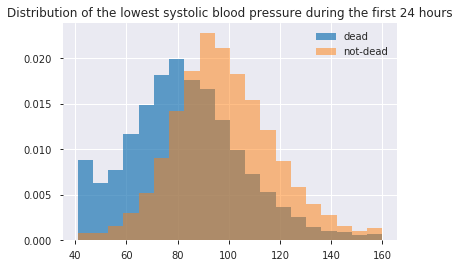

In [92]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_sysbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_sysbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest systolic blood pressure during the first 24 hours')

plt.show()

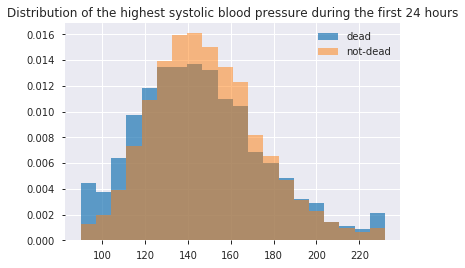

In [101]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_sysbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_sysbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest systolic blood pressure during the first 24 hours')

plt.show()

Same findings as mean blood pressure and diastolic blood pressure. How do we transform these variables? Group them?

# Diasbp during the first hour

In [98]:
wids.loc[wids['h1_diasbp_max'].isna(), 'hospital_death'].value_counts(normalize=True)

0    0.922078
1    0.077922
Name: hospital_death, dtype: float64

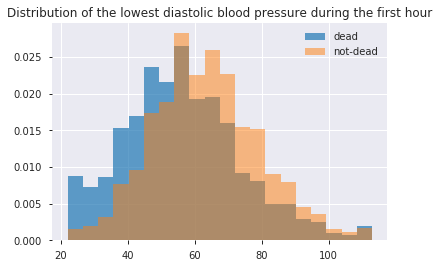

In [102]:
plt.hist(wids.loc[wids['hospital_death']==1, 'h1_diasbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'h1_diasbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest diastolic blood pressure during the first hour')

plt.show()

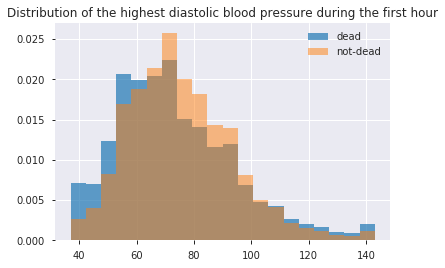

In [103]:
plt.hist(wids.loc[wids['hospital_death']==1, 'h1_diasbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'h1_diasbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest diastolic blood pressure during the first hour')

plt.show()

Same as before

In [109]:
# Track change (h1-d1). 
wids['dias_min_change'] = (wids['h1_diasbp_min'] - wids['d1_diasbp_min'])/wids['h1_diasbp_min']
wids['dias_max_change'] = (wids['h1_diasbp_max'] - wids['d1_diasbp_max'])/wids['h1_diasbp_max']

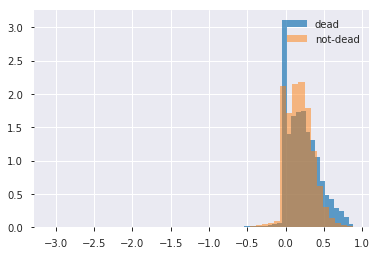

In [126]:
plt.hist(wids.loc[wids['hospital_death']==1, 'dias_min_change'], alpha=0.7, label = 'dead', bins = 50, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'dias_min_change'], alpha=0.5, label = 'not-dead', bins=50, density = True)
plt.legend(loc='upper right')

plt.show()

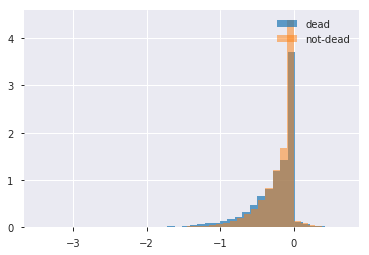

In [113]:
plt.hist(wids.loc[wids['hospital_death']==1, 'dias_max_change'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'dias_max_change'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

When patients'lowest diastolic blood pressure dropped by 50% or maintained after first hour , they tend to be positive. 

#### d1_heartrate_max (highest Heartrate)

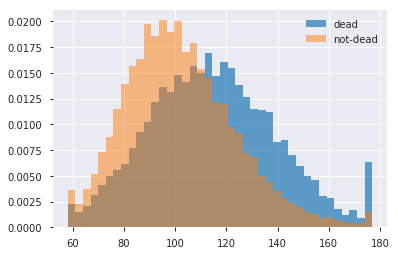

In [115]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_heartrate_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_heartrate_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

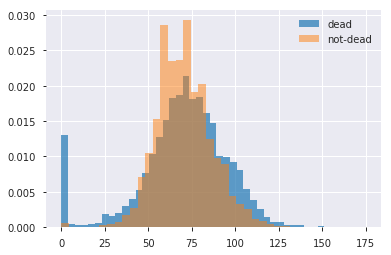

In [116]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_heartrate_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_heartrate_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

Outlier/Extreme values in this case is very important. DO NOT REMOVE. 

#### d1_resprate

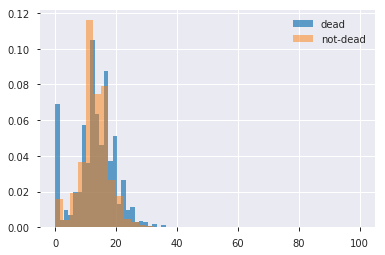

In [118]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_resprate_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_resprate_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

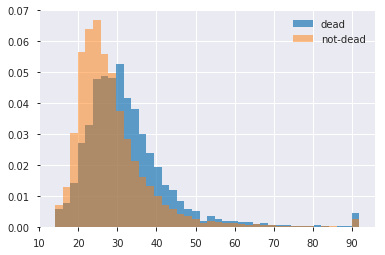

In [119]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_resprate_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_resprate_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

#### d1_spo2_max (Peripheral oxygen saturation)

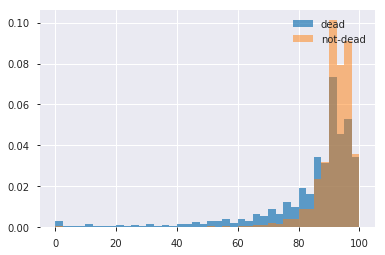

In [120]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_spo2_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_spo2_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

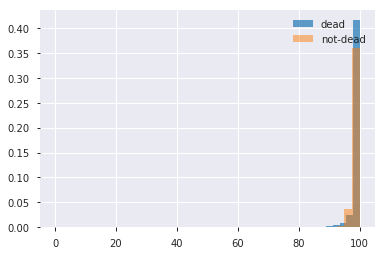

In [121]:
# We can exclude this one. 
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_spo2_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_spo2_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

#### temperature

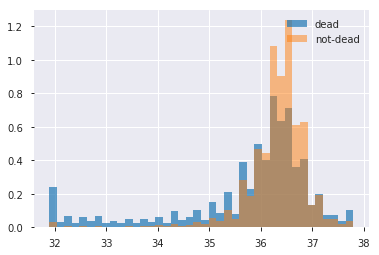

In [122]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_temp_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_temp_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

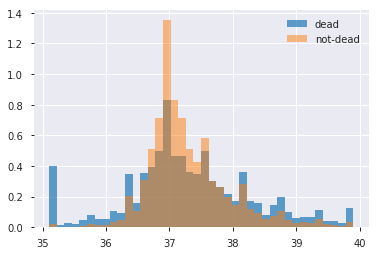

In [123]:
plt.hist(wids.loc[wids['hospital_death']==1, 'd1_temp_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(wids.loc[wids['hospital_death']==0, 'd1_temp_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
wids[['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min']]

# Profiling

In [3]:
profile = ProfileReport(wids, title='Pandas Profiling Report', html={'style':{'full_width':True}})

KeyboardInterrupt: 

# Demographics

In [107]:
demog_cols = ['hospital_death','age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'icu_admit_source', 'icu_id',
       'icu_stay_type', 'icu_type', 'pre_icu_los_days',
       'readmission_status', 'weight']

demog = wids[demog_cols]
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 15 columns):
hospital_death           91713 non-null int64
age                      87485 non-null float64
bmi                      88284 non-null float64
elective_surgery         91713 non-null int64
ethnicity                90318 non-null object
gender                   91688 non-null object
height                   90379 non-null float64
hospital_admit_source    70304 non-null object
icu_admit_source         91601 non-null object
icu_id                   91713 non-null int64
icu_stay_type            91713 non-null object
icu_type                 91713 non-null object
pre_icu_los_days         91713 non-null float64
readmission_status       91713 non-null int64
weight                   88993 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 10.5+ MB


In [124]:
num_col = ['age', 'bmi', 
          'height', 'pre_icu_los_days', 'weight']

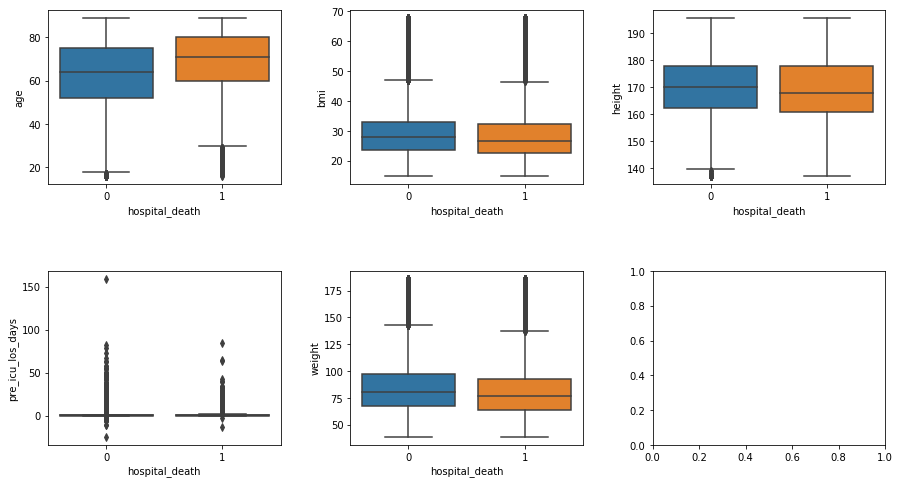

In [145]:
# Visualize numeric columns ~ target
fig, axes = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)

for i in range(0,5):
    sns.boxplot(x='hospital_death', y=num_col[i], data=wids, ax = axes.flat[i])

Text(0.5, 0, 'height')

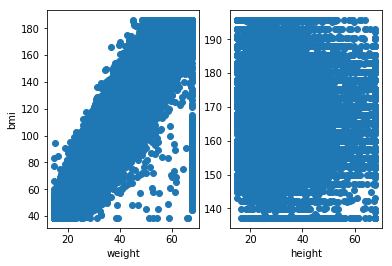

In [155]:
# BMI kilograms/metres^2
plt.subplot(1,2,1)
plt.scatter('bmi', 'weight', data=wids)
plt.xlabel('weight')
plt.ylabel('bmi')
plt.subplot(1,2,2)
plt.scatter('bmi', 'height', data=wids)
plt.xlabel('height')

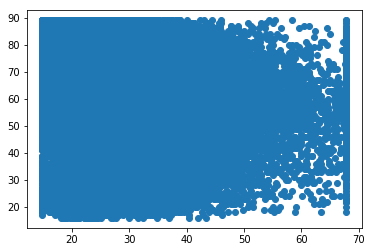

In [159]:
plt.scatter('bmi', 'age', data=wids)

# Vitals

In [105]:
np.array(wids.columns)

array(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death',
       'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'icu_admit_source', 'icu_id',
       'icu_stay_type', 'icu_type', 'pre_icu_los_days',
       'readmission_status', 'weight', 'albumin_apache',
       'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'bilirubin_apache',
       'bun_apache', 'creatinine_apache', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache', 'intubated_apache', 'map_apache',
       'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache',
       'resprate_apache', 'sodium_apache', 'temp_apache',
       'urineoutput_apache', 'ventilated_apache', 'wbc_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_non

(array([ 2230.,     0.,     0.,     0.,     0., 73128.,  4614.,  2068.,
         1202.,   524.]),
 array([-1.   , -0.803, -0.606, -0.409, -0.212, -0.015,  0.182,  0.379,
         0.576,  0.773,  0.97 ]),
 <a list of 10 Patch objects>)

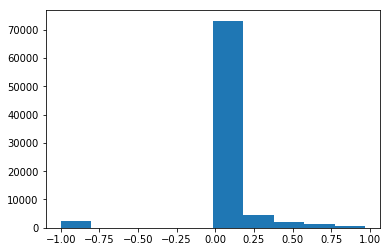

In [44]:
# KEEP apache_4a_icu_death_prob, 
plt.hist(wids['apache_4a_icu_death_prob'])

In [52]:
wids['apache_4a_icu_death_prob'].isna().sum()/wids.shape[0]

0.08665074744038467

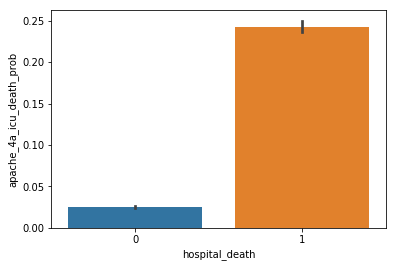

In [50]:
sns.barplot('hospital_death', 'apache_4a_icu_death_prob', data=wids)

In [41]:
wids.groupby('hospital_death')['apache_4a_icu_death_prob'].mean()

hospital_death
0    0.024799
1    0.242726
Name: apache_4a_icu_death_prob, dtype: float64

In [45]:
wids.groupby('hospital_death')['apache_4a_hospital_death_prob'].mean()

hospital_death
0    0.062882
1    0.334838
Name: apache_4a_hospital_death_prob, dtype: float64

In [47]:
wids.groupby('hospital_death')['h1_pao2fio2ratio_max'].mean()

hospital_death
0    249.107886
1    216.768753
Name: h1_pao2fio2ratio_max, dtype: float64

In [ ]:
plt.scatter()

# Create change columns

In [1]:
wids.info()

NameError: name 'wids' is not defined

In [6]:
# Function making for the group project
def diff_h1_d1(df):
    """
    Diff between first_hour and first_day max/min variables. 
    It shows the drop/increase of the measures (max/min).
    
    Parameters:
    -----------------------
    df:                pd.DataFrame
    
    
    Return:
    -----------------------
    output:            pd.DataFrame or pd.Series
                       one or multiple columns that went through the feature engineering. 
    """
    
    
    hd = df[['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max',
       'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
       'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',
       'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min',
       'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min',
       'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max',
       'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max',
       'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max',
       'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min',
       'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max',
       'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min',
       'd1_arterial_pco2_max', 'd1_arterial_pco2_min',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max',
       'd1_arterial_po2_min', 'd1_pao2fio2ratio_max',
       'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max',
       'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
       'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']]
    
    # Keep the synthesized ones. 
    hd = hd[hd.columns.drop(hd.filter(regex = 'invasive'))]

    hd = hd.reindex(sorted(hd.columns), axis=1)
    
    # h1-d1
    cols = hd.iloc[:, 52:].columns
    cols = [i.strip('h1_') + '_change' for i in cols] 

    output = pd.DataFrame(hd.iloc[:, 52:].values - hd.iloc[:, :52].values, columns=cols)
    
    return output

In [4]:
hd = wids[['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max',
       'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
       'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',
       'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min',
       'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min',
       'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max',
       'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max',
       'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max',
       'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min',
       'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max',
       'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min',
       'd1_arterial_pco2_max', 'd1_arterial_pco2_min',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max',
       'd1_arterial_po2_min', 'd1_pao2fio2ratio_max',
       'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max',
       'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
       'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']]


In [5]:
# Keep the synthesized ones. 
hd = hd[hd.columns.drop(hd.filter(regex = 'invasive'))]

hd = hd.reindex(sorted(hd.columns), axis=1)

In [6]:
# h1-d1
cols = hd.iloc[:, 52:].columns
cols = [i.strip('h1_') + '_change' for i in cols] 

hd_change = pd.DataFrame(hd.iloc[:, 52:].values - hd.iloc[:, :52].values, columns=cols)

In [7]:
# Keep the one that have less then 60% missing values
hd_change = hd_change[hd_change.columns[hd_change.isna().sum()/hd_change.shape[0] < 0.6]]

In [8]:
hd_change['hospital_death'] = wids['hospital_death']

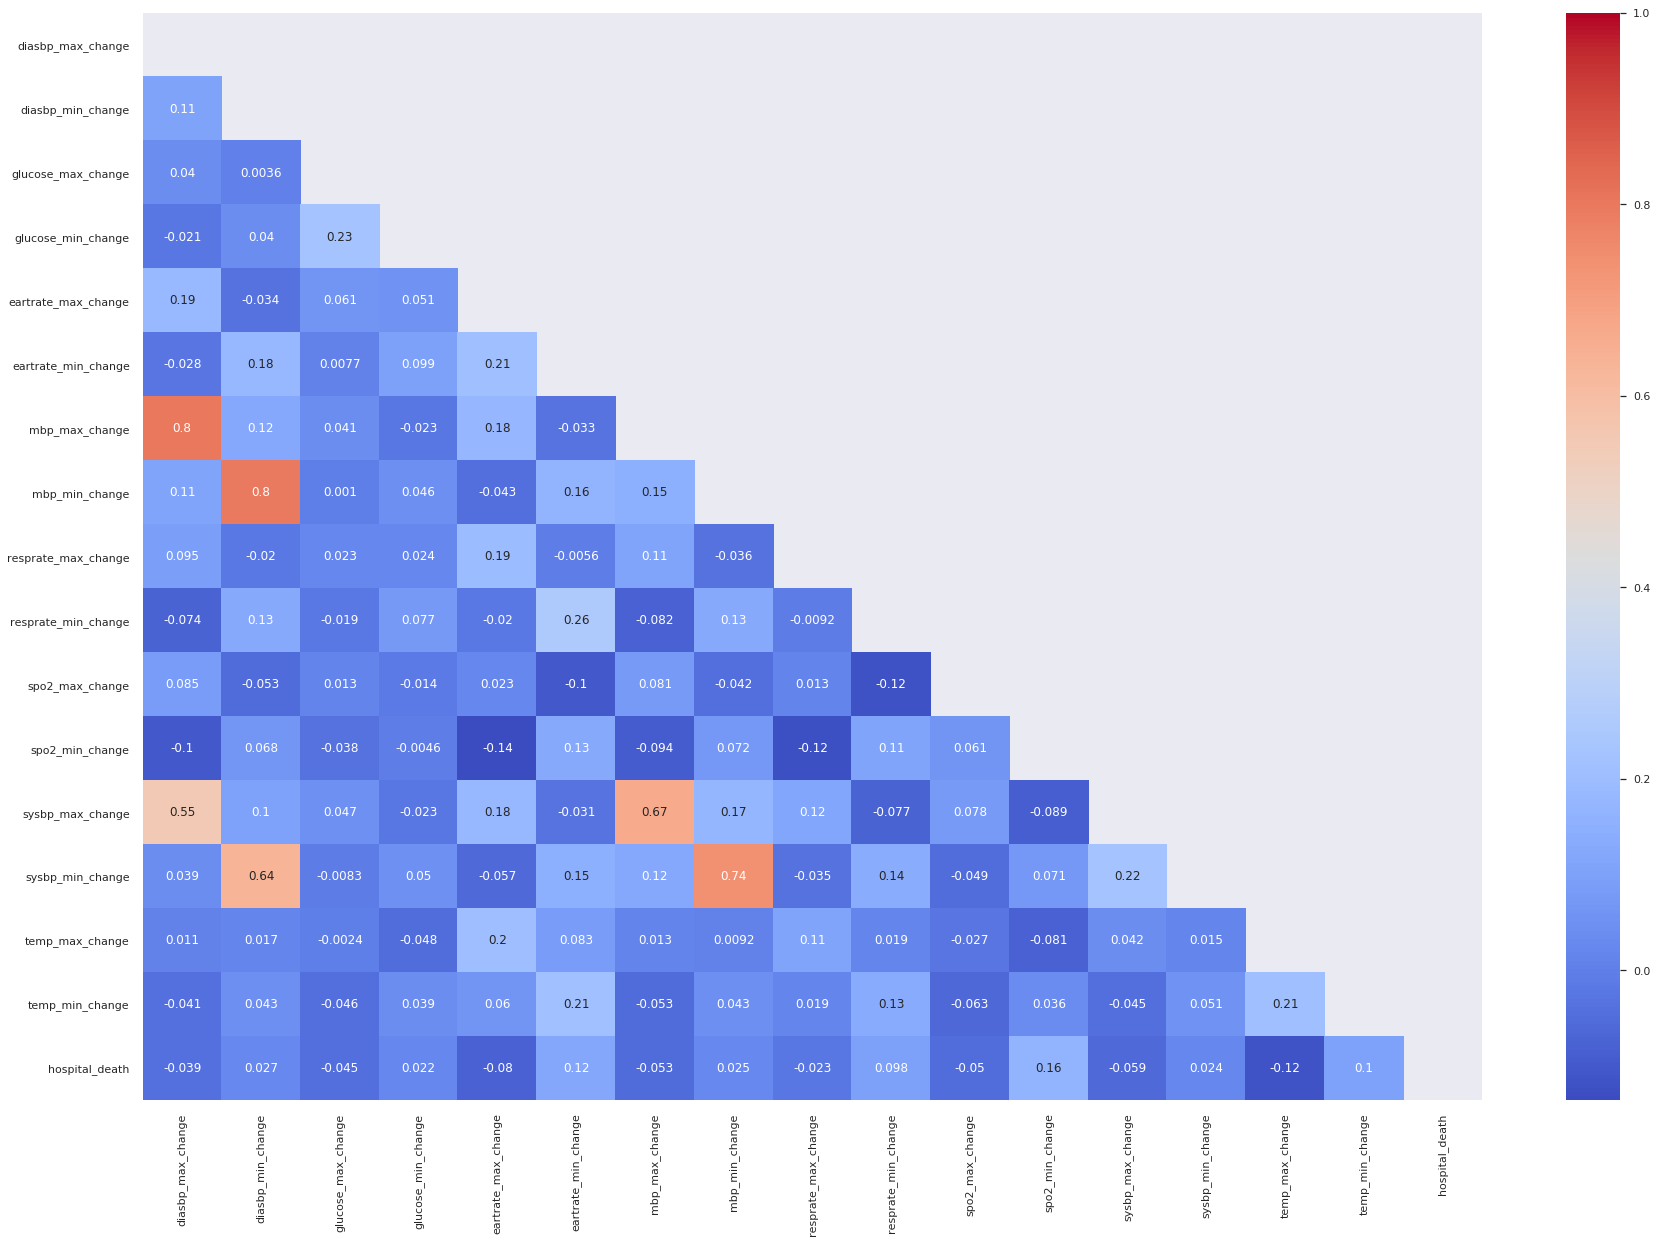

In [9]:
sns.set(rc={'figure.figsize':(30,20)})
matrix = np.triu(hd_change.corr())
sns.heatmap(hd_change.corr(), annot=True, mask=matrix, cmap = 'coolwarm')

In [10]:
hd_change = hd_change.drop(['diasbp_max_change', 'diasbp_min_change'], axis =1)

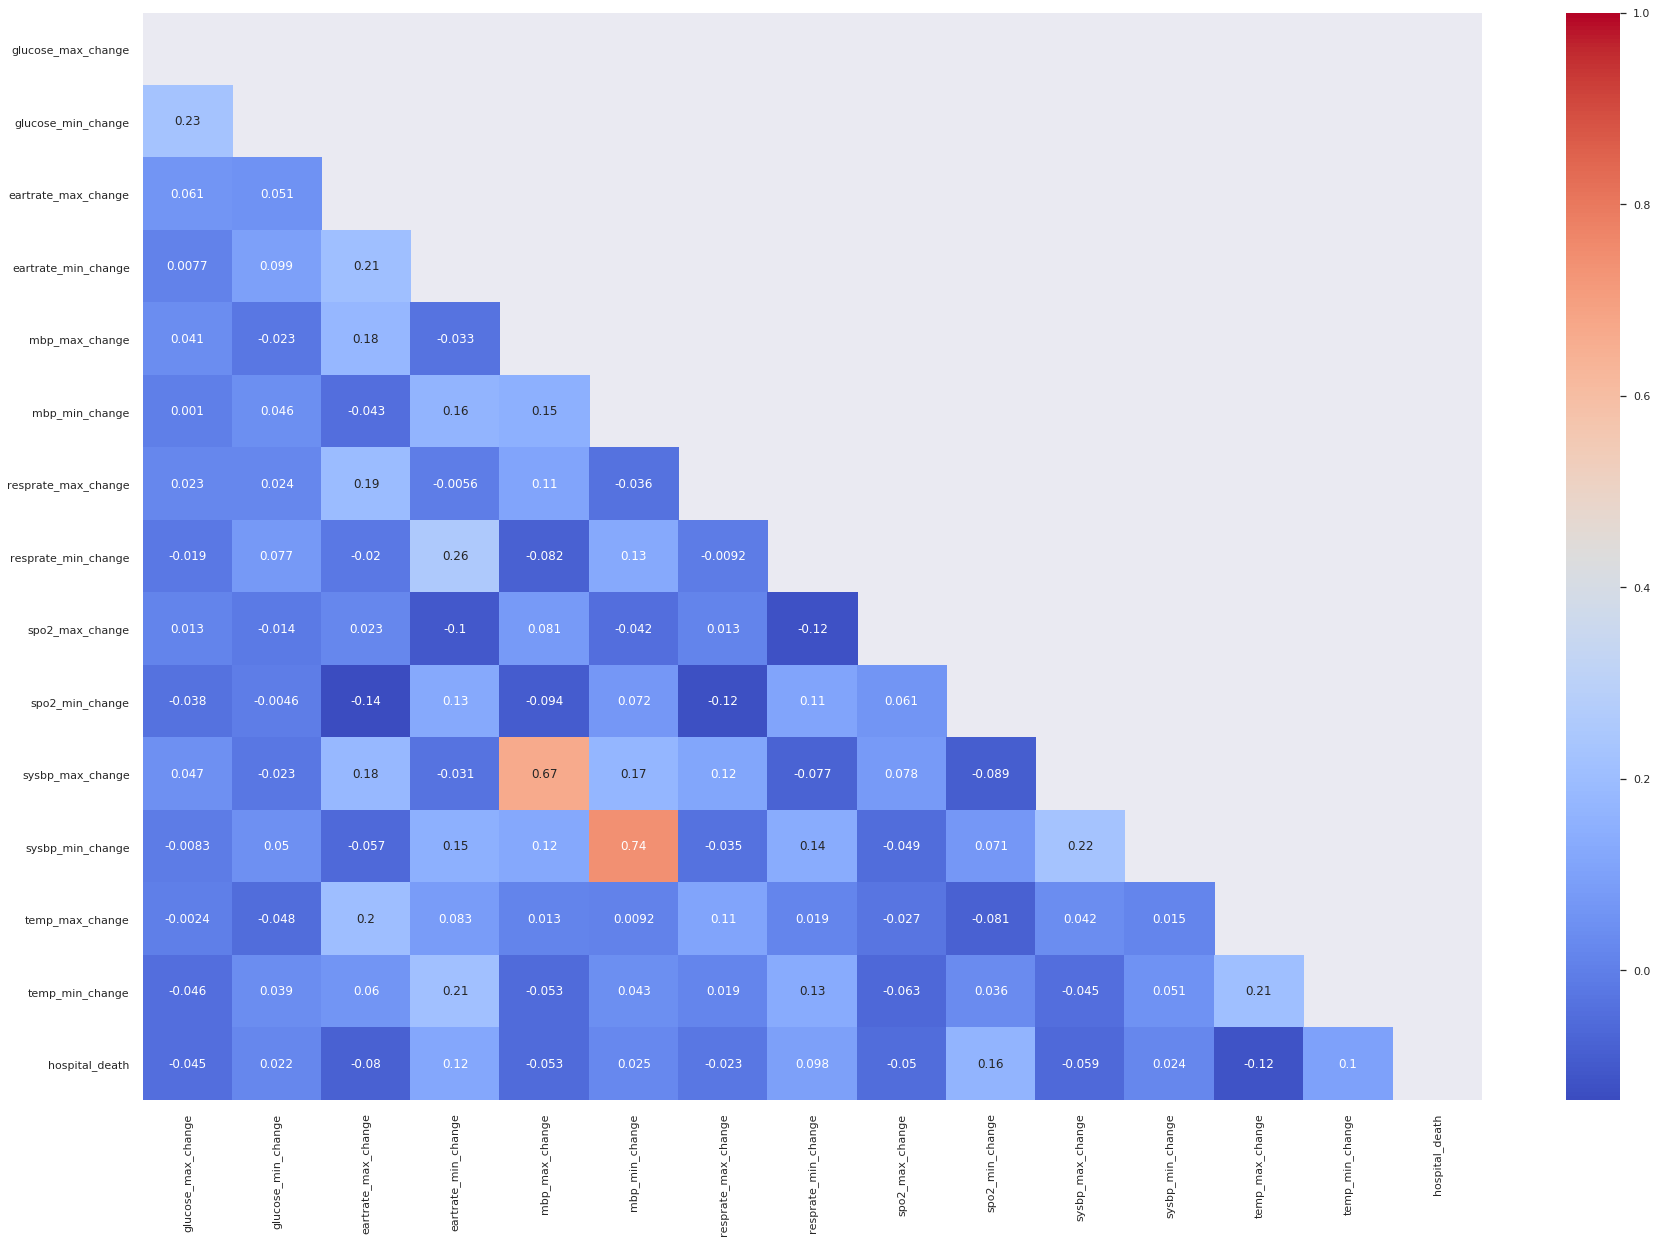

In [11]:
sns.set(rc={'figure.figsize':(30,20)})
matrix = np.triu(hd_change.corr())
sns.heatmap(hd_change.corr(), annot=True, mask=matrix, cmap = 'coolwarm')

#### Conclusion
13 change variables (h1-d1) were kept. 

# Cleaned Dataset

In [20]:
# Take out all invasive and non-invasive columns.
wids_cleaned = wids[wids.columns.drop(wids.filter(regex='invasive'))]

In [21]:
wids_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 162 entries, encounter_id to apache_2_bodysystem
dtypes: float64(146), int64(8), object(8)
memory usage: 113.4+ MB


In [22]:
# Drop manually 
wids_cleaned.drop(['h1_spo2_max', 'h1_spo2_min', 'd1_albumin_max', 'd1_albumin_min',
       'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_creatinine_max', 'd1_glucose_max', 
                   'd1_hco3_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min',
                  'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_min', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'h1_albumin_max', 'h1_albumin_min',
       'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min',
       'h1_calcium_max', 'h1_calcium_min'], axis =1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
wids_cleaned.drop(['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'], axis=1, inplace=True)

In [24]:
pd.concat([wids_cleaned, hd_change], axis=1)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,mbp_min_change,resprate_max_change,resprate_min_change,spo2_max_change,spo2_min_change,sysbp_max_change,sysbp_min_change,temp_max_change,temp_min_change,hospital_death
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,39.0,-8.0,8.0,0.0,0.0,0.0,42.0,-0.4,0.3,0
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,19.0,-1.0,16.0,-5.0,0.0,-64.0,4.0,0.0,1.2,0
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,15.0,-1.0,8.0,0.0,0.0,0.0,19.0,-0.3,0.0,0
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,-13.0,-11.0,4.0,0.0,4.0,-22.0,22.0,-2.4,0.0,0
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,2.0,NaN,NaN,0.0,4.0,-17.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,7.0,-3.0,7.0,-2.0,12.0,-34.0,20.0,0.0,1.6,0
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,21.0,-5.0,10.0,-1.0,51.0,0.0,42.0,-1.3,0.0,0
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.8,0
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [25]:
wids_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 125 entries, encounter_id to apache_4a_icu_death_prob
dtypes: float64(111), int64(8), object(6)
memory usage: 87.5+ MB


In [18]:
# Keep columns with missing values than 60%. 
wids_cleaned = wids_cleaned[wids_cleaned.columns[wids_cleaned.isna().sum()/wids.shape[0] < 0.6]]

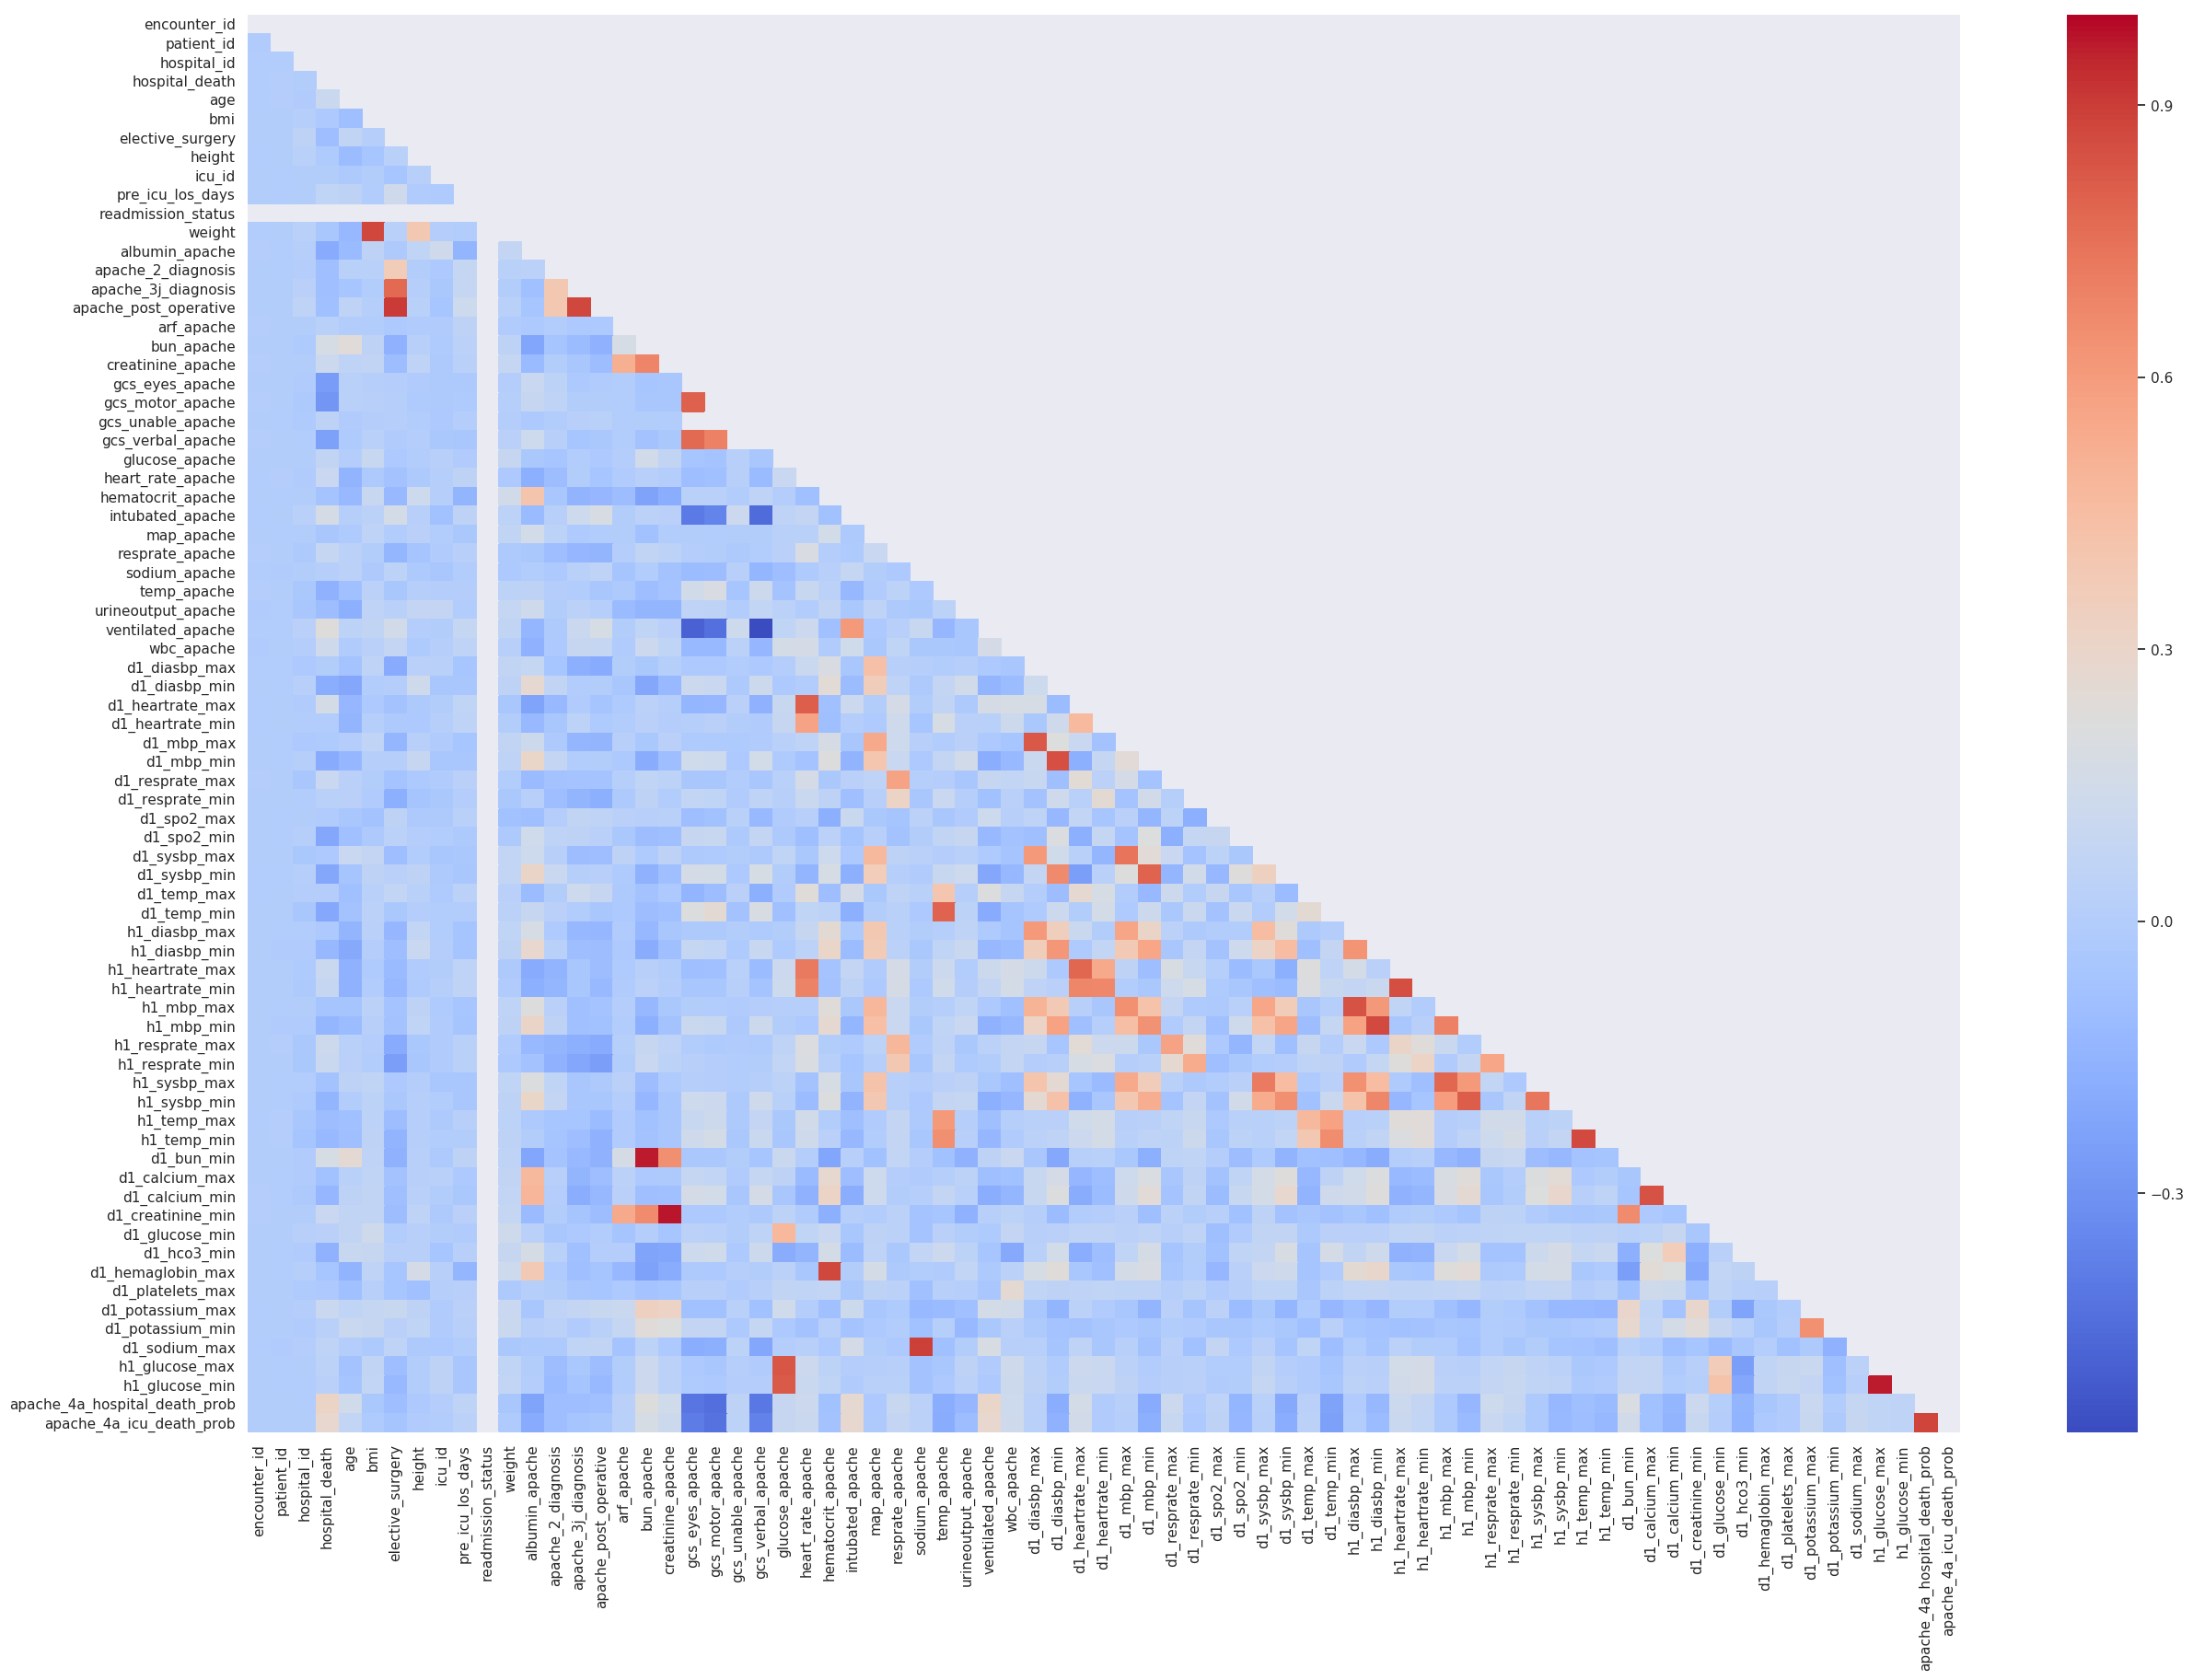

In [178]:
sns.set(rc={'figure.figsize':(30,20)})
matrix = np.triu(wids_cleaned.corr())
sns.heatmap(wids_cleaned.corr(), mask=matrix, cmap = 'coolwarm')

In [179]:
wids_cleaned.to_csv('wids_reduced.csv', index=False)